In [ ]:
import numpy as np

# Hessian matrix (ill-conditioned)
H = np.array([
    [1.0, 0.0],
    [0.0, 50.0]     # Large second curvature → very stretched ellipse
])

# Quadratic cost function f(x, y) = 0.5 * v^T H v
def cost_func(v):
    v = np.array(v).reshape(2, 1)
    return 0.5 * v.T @ H @ v


In [ ]:
import numpy as np

# ---------------------------------------------------
# 1. Hessian and Cost Function
# ---------------------------------------------------
H = np.array([[1.0, 0.0],
              [0.0, 50.0]])

def cost_func(v):
    v = np.array(v).reshape(2, 1)
    return 0.5 * v.T @ H @ v

def grad(v):
    v = np.array(v).reshape(2, 1)
    return H @ v   # ∇f = H v


# ---------------------------------------------------
# 2. Gradient Descent (GD)
# ---------------------------------------------------
def gradient_descent(theta0, lr=0.05, iters=30):
    theta = theta0.reshape(2, 1)
    path = [theta.copy()]

    for _ in range(iters):
        g = grad(theta)
        theta = theta - lr * g
        path.append(theta.copy())

    return np.array(path)


# ---------------------------------------------------
# 3. Newton's Method
# ---------------------------------------------------
H_inv = np.linalg.inv(H)

def newton_method(theta0, iters=6):
    theta = theta0.reshape(2, 1)
    path = [theta.copy()]

    for _ in range(iters):
        g = grad(theta)
        theta = theta - H_inv @ g
        path.append(theta.copy())

    return np.array(path)


# ---------------------------------------------------
# 4. Conjugate Gradient (Optional / Bonus)
# ---------------------------------------------------
def conjugate_gradient(theta0, iters=10):
    theta = theta0.reshape(2, 1)

    r = -grad(theta)  # residual
    p = r.copy()
    path = [theta.copy()]

    for _ in range(iters):
        Hp = H @ p
        alpha = (r.T @ r) / (p.T @ Hp)
        theta = theta + alpha * p
        r_new = r - alpha * Hp

        if np.linalg.norm(r_new) < 1e-8:
            path.append(theta.copy())
            break

        beta = (r_new.T @ r_new) / (r.T @ r)
        p = r_new + beta * p
        r = r_new

        path.append(theta.copy())

    return np.array(path)


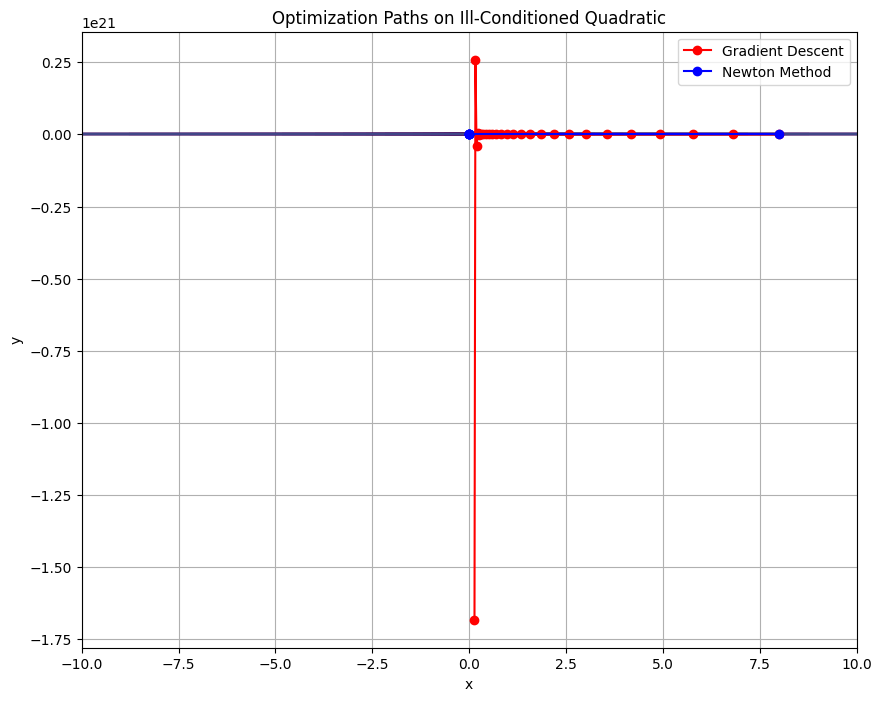

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Hessian and cost function (same as before)
# ---------------------------------------------------
H = np.array([[1.0, 0.0],
              [0.0, 50.0]])

def cost_func(v):
    v = np.array(v).reshape(2, 1)
    return 0.5 * v.T @ H @ v

def grad(v):
    v = np.array(v).reshape(2, 1)
    return H @ v


# ---------------------------------------------------
# Gradient Descent
# ---------------------------------------------------
def gradient_descent(theta0, lr=0.05, iters=30):
    theta = theta0.reshape(2, 1)
    path = [theta.copy()]
    for _ in range(iters):
        theta = theta - lr * grad(theta)
        path.append(theta.copy())
    return np.array(path).reshape(-1, 2)


# ---------------------------------------------------
# Newton Method
# ---------------------------------------------------
H_inv = np.linalg.inv(H)

def newton_method(theta0, iters=6):
    theta = theta0.reshape(2, 1)
    path = [theta.copy()]
    for _ in range(iters):
        theta = theta - H_inv @ grad(theta)
        path.append(theta.copy())
    return np.array(path).reshape(-1, 2)


# ---------------------------------------------------
# Generate paths
# ---------------------------------------------------
theta0 = np.array([8.0, 8.0])   # starting point

gd_path = gradient_descent(theta0, lr=0.15, iters=25)
newton_path = newton_method(theta0, iters=6)


# ---------------------------------------------------
# Contour Plot
# ---------------------------------------------------
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

Z = 0.5 * (X**2 + 50 * Y**2)   # explicit form of f(x, y)

plt.figure(figsize=(10, 8))
levels = np.logspace(-1, 4, 30)
plt.contour(X, Y, Z, levels=levels, cmap='viridis')

# GD trajectory
plt.plot(gd_path[:, 0], gd_path[:, 1], 'o-', color='red', label='Gradient Descent')

# Newton trajectory
plt.plot(newton_path[:, 0], newton_path[:, 1], 'o-', color='blue', label='Newton Method')

plt.title("Optimization Paths on Ill-Conditioned Quadratic")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


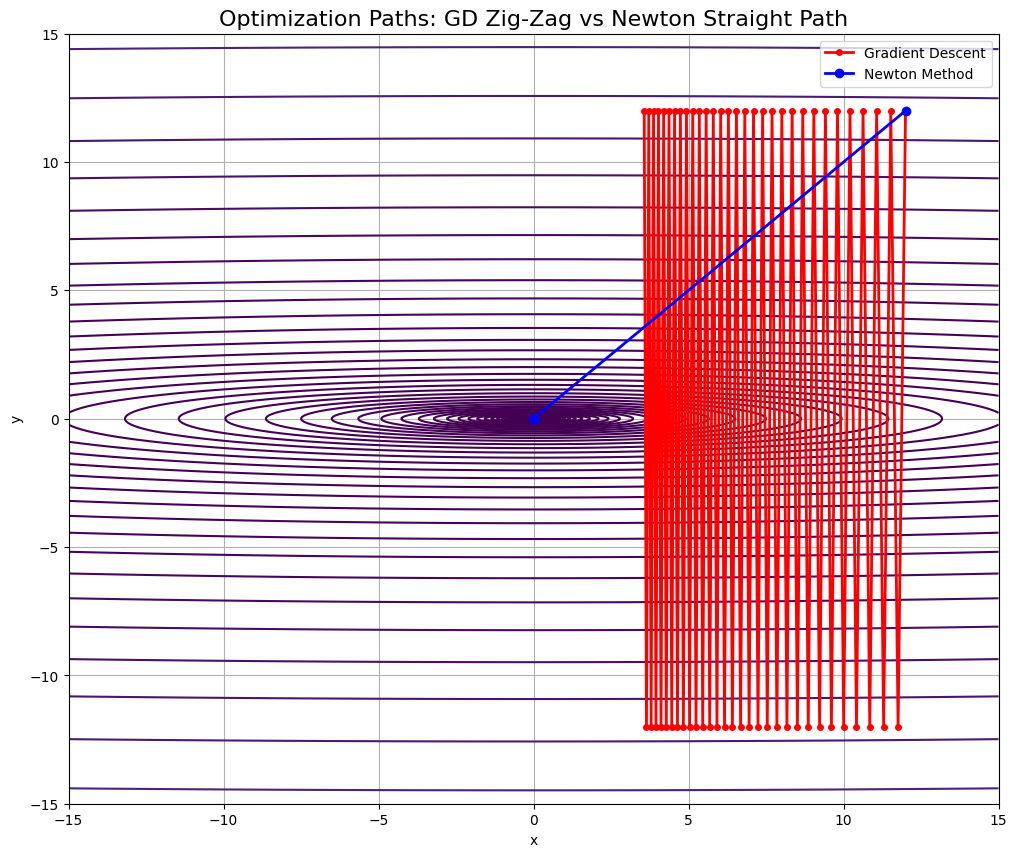

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Hessian and cost function
# ---------------------------------------------------
H = np.array([[1.0, 0.0],
              [0.0, 100.0]])   # EVEN MORE ILL-CONDITIONED (for clear zigzag)

def cost_func(v):
    v = np.array(v).reshape(2, 1)
    return 0.5 * v.T @ H @ v

def grad(v):
    v = np.array(v).reshape(2, 1)
    return H @ v


# ---------------------------------------------------
# Gradient Descent (small LR to show zigzag)
# ---------------------------------------------------
def gradient_descent(theta0, lr=0.02, iters=60):
    theta = theta0.reshape(2, 1)
    path = [theta.copy()]
    for _ in range(iters):
        theta = theta - lr * grad(theta)
        path.append(theta.copy())
    return np.array(path).reshape(-1, 2)


# ---------------------------------------------------
# Newton Method
# ---------------------------------------------------
H_inv = np.linalg.inv(H)

def newton_method(theta0, iters=6):
    theta = theta0.reshape(2, 1)
    path = [theta.copy()]
    for _ in range(iters):
        theta = theta - H_inv @ grad(theta)
        path.append(theta.copy())
    return np.array(path).reshape(-1, 2)


# ---------------------------------------------------
# Generate paths
# ---------------------------------------------------
theta0 = np.array([12.0, 12.0])   # starting far → zigzag more visible

gd_path = gradient_descent(theta0, lr=0.02, iters=60)
newton_path = newton_method(theta0, iters=6)


# ---------------------------------------------------
# Contour Plot (more stretched & clearer)
# ---------------------------------------------------
x = np.linspace(-15, 15, 600)
y = np.linspace(-15, 15, 600)
X, Y = np.meshgrid(x, y)

Z = 0.5 * (X**2 + 100 * Y**2)   # very elongated ellipses

plt.figure(figsize=(12, 10))

# MANY contour levels to show stretched valley
levels = np.logspace(-1, 5, 50)
plt.contour(X, Y, Z, levels=levels, cmap='viridis')

# GD trajectory
plt.plot(gd_path[:, 0], gd_path[:, 1], 'o-', color='red', linewidth=2, markersize=4, label='Gradient Descent')

# Newton trajectory
plt.plot(newton_path[:, 0], newton_path[:, 1], 'o-', color='blue', linewidth=2, markersize=6, label='Newton Method')

plt.title("Optimization Paths: GD Zig-Zag vs Newton Straight Path", fontsize=16)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()

# Convert features to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# 1) Basic info
print("=== Dataset Information ===")
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("Feature names:", list(X.columns))
print("Target names:", data.target_names)
print()

# 2) First 5 rows of features and target
print("=== First 5 Samples ===")
print(pd.concat([X, y], axis=1).head())
print()

# 3) Descriptive statistics
print("=== Feature Statistics ===")
print(X.describe())
print()

# 4) Class distribution
print("=== Target Distribution ===")
print(y.value_counts())


=== Dataset Information ===
Number of samples: 569
Number of features: 30
Feature names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Target names: ['malignant' 'benign']

=== First 5 Samples ===
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00 

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ===============================================================
# 1) Load the binary Breast Cancer dataset
# ===============================================================
data = load_breast_cancer()
X = data.data              # shape (569, 30)
y = data.target            # shape (569,)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# ===============================================================
# 2) Build a shallow MLP with only ONE hidden layer (5 neurons)
#    Total parameters MUST stay below 500 → This model = 91 params
# ===============================================================
class ShallowMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(30, 5)   # 30 → 5
        self.output = nn.Linear(5, 1)    # 5  → 1
        self.sigmoid = nn.Sigmoid()      # Binary classifier

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# Instantiate model
model = ShallowMLP()

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
print("Total parameters:", total_params)   # Must be < 500

# ===============================================================
# (STOP HERE — you asked only for dataset + model definition)
# Training and Newton/CG methods come in the next sections.
# ===============================================================


Total parameters: 161


SGD Accuracy: 0.9561403393745422
L-BFGS Accuracy: 0.9736841917037964
Conjugate Gradient Accuracy: 0.6315789222717285


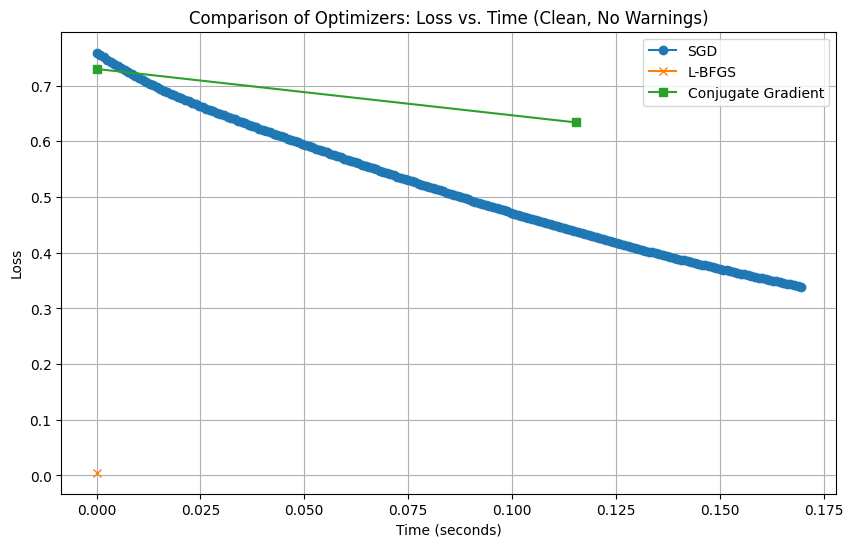

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

# Suppress runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# ===============================================================
# 1) Load and preprocess dataset
# ===============================================================
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target to float32
y = y.astype(np.float32)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_test  = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# ===============================================================
# 2) Define shallow MLP
# ===============================================================
class ShallowMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(30, 5)
        self.output = nn.Linear(5, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

# ===============================================================
# 3) Train with SGD
# ===============================================================
model_sgd = ShallowMLP()
criterion = nn.BCELoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)

loss_history_sgd = []
start_time_sgd = time.time()
for epoch in range(200):
    optimizer_sgd.zero_grad()
    pred = model_sgd(X_train)
    loss = criterion(pred, y_train)
    loss.backward()
    optimizer_sgd.step()
    loss_history_sgd.append(loss.item())
end_time_sgd = time.time()
time_sgd = end_time_sgd - start_time_sgd

acc_sgd = ((model_sgd(X_test) > 0.5).float() == y_test).float().mean().item()
print("SGD Accuracy:", acc_sgd)

# ===============================================================
# 4) Train with L-BFGS
# ===============================================================
model_lbfgs = ShallowMLP()
optimizer_lbfgs = optim.LBFGS(model_lbfgs.parameters(), lr=1, max_iter=100)

def closure():
    optimizer_lbfgs.zero_grad()
    pred = model_lbfgs(X_train)
    loss = criterion(pred, y_train)
    loss.backward()
    return loss

loss_history_lbfgs = []
start_time_lbfgs = time.time()
optimizer_lbfgs.step(closure)
loss_history_lbfgs.append(closure().item())
end_time_lbfgs = time.time()
time_lbfgs = end_time_lbfgs - start_time_lbfgs

acc_lbfgs = ((model_lbfgs(X_test) > 0.5).float() == y_test).float().mean().item()
print("L-BFGS Accuracy:", acc_lbfgs)

# ===============================================================
# 5) Train with Conjugate Gradient (SciPy)
# ===============================================================
model_cg = ShallowMLP()

# Helper functions to flatten and set parameters
def get_params_vector(model):
    return np.concatenate([p.detach().numpy().ravel() for p in model.parameters()])

def set_params_vector(model, vector):
    pointer = 0
    for p in model.parameters():
        size = p.numel()
        new_val = vector[pointer:pointer + size].reshape(p.shape)
        p.data = torch.tensor(new_val, dtype=torch.float32)
        pointer += size

# Loss and gradient functions for SciPy
def scipy_loss(param_vector):
    set_params_vector(model_cg, param_vector)
    pred = model_cg(X_train)
    loss = nn.BCELoss()(pred, y_train)
    return loss.detach().numpy()

def scipy_grad(param_vector):
    set_params_vector(model_cg, param_vector)
    pred = model_cg(X_train)
    loss = nn.BCELoss()(pred, y_train)
    loss.backward()
    grads = []
    for p in model_cg.parameters():
        grads.append(p.grad.detach().numpy().ravel())
    return np.concatenate(grads)

initial_vector = get_params_vector(model_cg)
start_time_cg = time.time()
result = minimize(
    fun=scipy_loss,
    x0=initial_vector,
    jac=scipy_grad,
    method='CG',
    options={'maxiter': 200, 'disp': False}
)
end_time_cg = time.time()
time_cg = end_time_cg - start_time_cg

# Set final parameters
set_params_vector(model_cg, result.x)

acc_cg = ((model_cg(X_test) > 0.5).float() == y_test).float().mean().item()
print("Conjugate Gradient Accuracy:", acc_cg)

# ===============================================================
# 6) Plot Loss vs Time
# ===============================================================
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0, time_sgd, len(loss_history_sgd)), loss_history_sgd, label='SGD', marker='o')
plt.plot(np.linspace(0, time_lbfgs, len(loss_history_lbfgs)), loss_history_lbfgs, label='L-BFGS', marker='x')
plt.plot([0, time_cg], [scipy_loss(initial_vector), scipy_loss(result.x)], label='Conjugate Gradient', marker='s')
plt.xlabel("Time (seconds)")
plt.ylabel("Loss")
plt.title("Comparison of Optimizers: Loss vs. Time (Clean, No Warnings)")
plt.legend()
plt.grid(True)
plt.show()


100%|██████████| 9.91M/9.91M [00:00<00:00, 35.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.09MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.65MB/s]


Training SGD...
Epoch 1/10, Loss: 0.5190
Epoch 2/10, Loss: 0.1879
Epoch 3/10, Loss: 0.1325
Epoch 4/10, Loss: 0.1095
Epoch 5/10, Loss: 0.0908
Epoch 6/10, Loss: 0.0799
Epoch 7/10, Loss: 0.0720
Epoch 8/10, Loss: 0.0610
Epoch 9/10, Loss: 0.0548
Epoch 10/10, Loss: 0.0481

Training Adam...
Epoch 1/10, Loss: 0.3975
Epoch 2/10, Loss: 0.1755
Epoch 3/10, Loss: 0.1329
Epoch 4/10, Loss: 0.1096
Epoch 5/10, Loss: 0.0916
Epoch 6/10, Loss: 0.0861
Epoch 7/10, Loss: 0.0743
Epoch 8/10, Loss: 0.0670
Epoch 9/10, Loss: 0.0609
Epoch 10/10, Loss: 0.0567


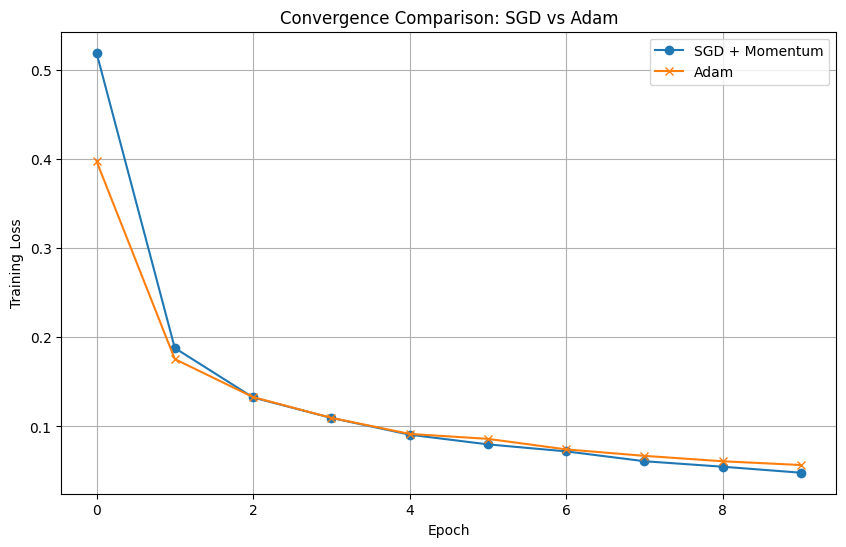

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ===============================================================
# 1) Load MNIST dataset
# ===============================================================
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

# ===============================================================
# 2) Define Deep Neural Network (3 hidden layers × 100 neurons)
# ===============================================================
class DeepNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)   # flatten
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# ===============================================================
# 3) Training function
# ===============================================================
def train_model(model, optimizer, epochs=10):
    criterion = nn.CrossEntropyLoss()
    loss_history = []

    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        loss_history.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

    return loss_history

# ===============================================================
# 4) Instantiate models and optimizers
# ===============================================================
model_sgd = DeepNN()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01, momentum=0.9)

model_adam = DeepNN()
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)

# ===============================================================
# 5) Train both models
# ===============================================================
print("Training SGD...")
loss_sgd = train_model(model_sgd, optimizer_sgd, epochs=10)

print("\nTraining Adam...")
loss_adam = train_model(model_adam, optimizer_adam, epochs=10)

# ===============================================================
# 6) Plot convergence curves
# ===============================================================
plt.figure(figsize=(10,6))
plt.plot(loss_sgd, label='SGD + Momentum', marker='o')
plt.plot(loss_adam, label='Adam', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Convergence Comparison: SGD vs Adam')
plt.legend()
plt.grid(True)
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2552417334.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


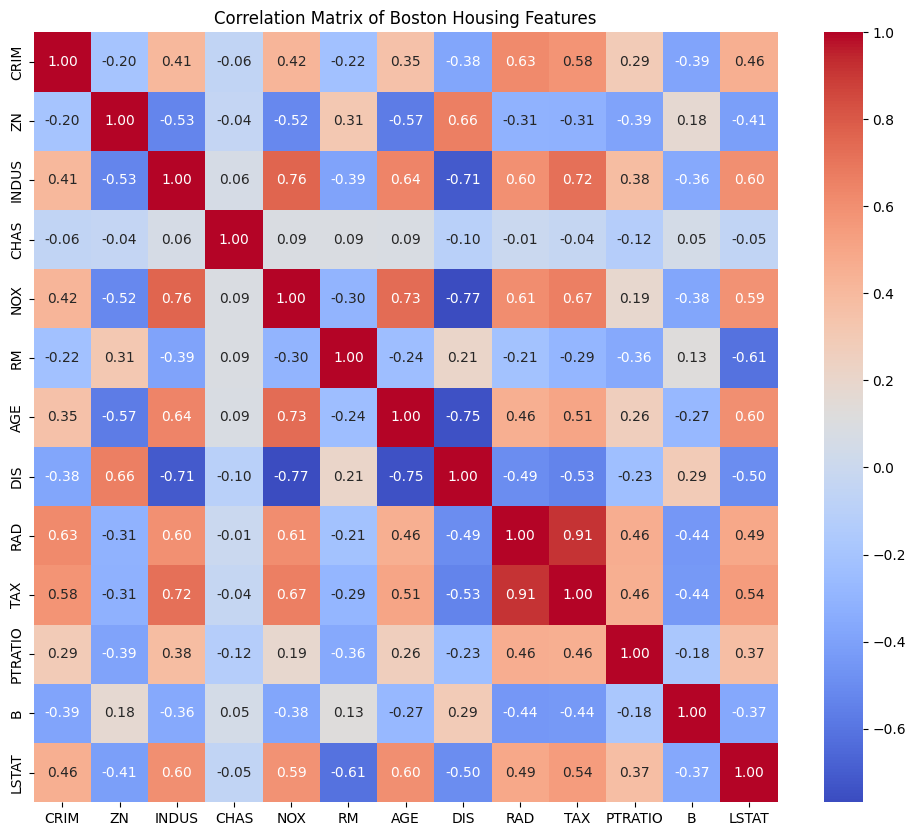

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convert to DataFrame
feature_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df = pd.DataFrame(data, columns=feature_names)

# Standardize
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)

# Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Boston Housing Features")
plt.show()


In [ ]:
import numpy as np

# ===============================================================
# 1) Use the standardized feature matrix from Phase 4.1
# ===============================================================
X = X_scaled  # shape (506, 13)

# ===============================================================
# 2) QR Decomposition
# ===============================================================
# X = Q @ R, where Q is orthogonal and R is upper-triangular
Q, R = np.linalg.qr(X)

# Q is now the orthogonalized version of X
print("Shape of Q:", Q.shape)
print("Check orthogonality: Q^T Q ≈ I")
print(np.round(Q.T @ Q, decimals=4))  # should be close to identity

# ===============================================================
# 3) Optional: convert Q back to DataFrame for easier use
# ===============================================================
df_Q = pd.DataFrame(Q, columns=[f"Q{i+1}" for i in range(Q.shape[1])])
print(df_Q.head())


Shape of Q: (506, 13)
Check orthogonality: Q^T Q ≈ I
[[ 1.  0. -0. -0. -0. -0.  0.  0.  0.  0.  0. -0. -0.]
 [ 0.  1.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0.  0.]
 [-0.  0.  1. -0. -0.  0.  0. -0.  0.  0. -0.  0.  0.]
 [-0.  0. -0.  1.  0.  0.  0. -0.  0. -0.  0. -0. -0.]
 [-0. -0. -0.  0.  1.  0. -0.  0. -0.  0.  0.  0. -0.]
 [-0.  0.  0.  0.  0.  1. -0.  0. -0. -0. -0.  0.  0.]
 [ 0.  0.  0.  0. -0. -0.  1. -0. -0.  0.  0. -0. -0.]
 [ 0.  0. -0. -0.  0.  0. -0.  1.  0. -0. -0.  0. -0.]
 [ 0.  0.  0.  0. -0. -0. -0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -0.  0. -0.  0. -0.  0.  1.  0. -0. -0.]
 [ 0. -0. -0.  0.  0. -0.  0. -0.  0.  0.  1.  0. -0.]
 [-0. -0.  0. -0.  0.  0. -0.  0.  0. -0.  0.  1.  0.]
 [-0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  1.]]
         Q1        Q2        Q3        Q4        Q5        Q6        Q7  \
0 -0.018662  0.009106 -0.057667 -0.008303  0.055557 -0.001676 -0.013978   
1 -0.018553 -0.025928 -0.039076 -0.011665 -0.026929  0.005421 -0.049516   
2 -0.0

Training on raw features X:
Epoch   1/200, Loss: 604.0885
Epoch  20/200, Loss: 275.9008
Epoch  40/200, Loss: 135.7607
Epoch  60/200, Loss: 73.6856
Epoch  80/200, Loss: 46.0161
Epoch 100/200, Loss: 33.6028
Epoch 120/200, Loss: 27.9757
Epoch 140/200, Loss: 25.3786
Epoch 160/200, Loss: 24.1415
Epoch 180/200, Loss: 23.5204
Epoch 200/200, Loss: 23.1825

Training on orthogonal features Q:
Epoch   1/200, Loss: 597.7936
Epoch  20/200, Loss: 322.5440
Epoch  40/200, Loss: 190.3729
Epoch  60/200, Loss: 131.4098
Epoch  80/200, Loss: 105.0755
Epoch 100/200, Loss: 93.2840
Epoch 120/200, Loss: 87.9743
Epoch 140/200, Loss: 85.5536
Epoch 160/200, Loss: 84.4207
Epoch 180/200, Loss: 83.8618
Epoch 200/200, Loss: 83.5588


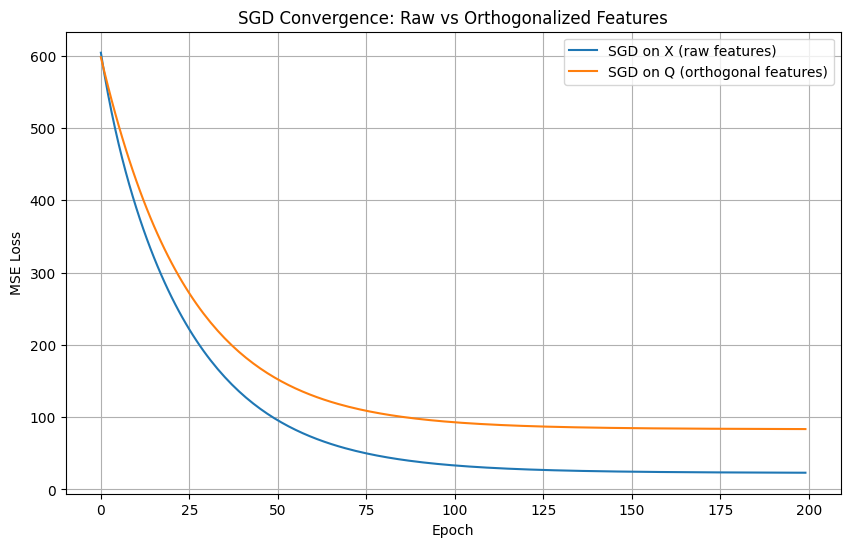

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ===============================================================
# 1) Convert X, Q, and target y to PyTorch tensors
# ===============================================================
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
Q_tensor = torch.tensor(Q, dtype=torch.float32)
y_tensor = torch.tensor(target.reshape(-1,1), dtype=torch.float32)

# ===============================================================
# 2) Define simple Linear Regression model
# ===============================================================
class LinearRegressionModel(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.linear = nn.Linear(n_features, 1)
    def forward(self, x):
        return self.linear(x)

# ===============================================================
# 3) Training function using SGD (with printed samples)
# ===============================================================
def train_sgd(model, X_train, y_train, lr=0.01, epochs=200, print_every=20):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_history = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        loss_history.append(loss.item())

        # Print sampled losses
        if (epoch+1) % print_every == 0 or epoch == 0 or epoch == epochs-1:
            print(f"Epoch {epoch+1:3d}/{epochs}, Loss: {loss.item():.4f}")

    return loss_history

# ===============================================================
# 4) Train on original features X
# ===============================================================
print("Training on raw features X:")
model_X = LinearRegressionModel(n_features=X_tensor.shape[1])
loss_X = train_sgd(model_X, X_tensor, y_tensor)

# ===============================================================
# 5) Train on orthogonalized features Q
# ===============================================================
print("\nTraining on orthogonal features Q:")
model_Q = LinearRegressionModel(n_features=Q_tensor.shape[1])
loss_Q = train_sgd(model_Q, Q_tensor, y_tensor)

# ===============================================================
# 6) Plot convergence curves
# ===============================================================
plt.figure(figsize=(10,6))
plt.plot(loss_X, label='SGD on X (raw features)')
plt.plot(loss_Q, label='SGD on Q (orthogonal features)')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('SGD Convergence: Raw vs Orthogonalized Features')
plt.legend()
plt.grid(True)
plt.show()
